In [ ]:
!git clone https://github.com/thanhvdt/jigsaw-toxic-comment-classification.git

fatal: destination path 'jigsaw-toxic-comment-classification' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np
import re
import nltk 
import csv
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('/content/jigsaw-toxic-comment-classification/data/train.csv')

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Data exploration

In [ ]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


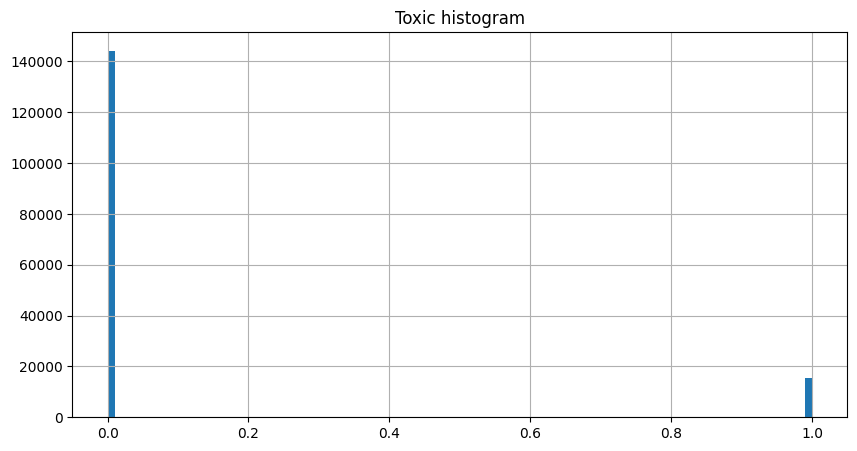

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['toxic'].hist(bins = 100)
plt.title('Toxic histogram')
plt.show()

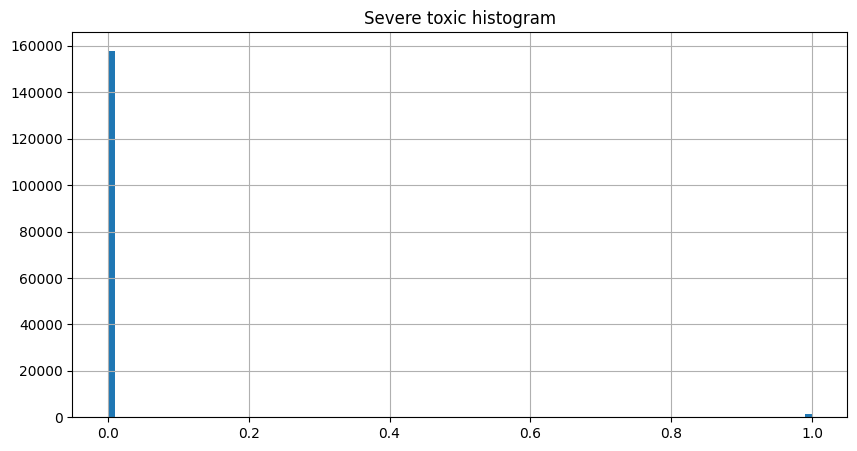

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['severe_toxic'].hist(bins = 100)
plt.title('Severe toxic histogram')
plt.show()

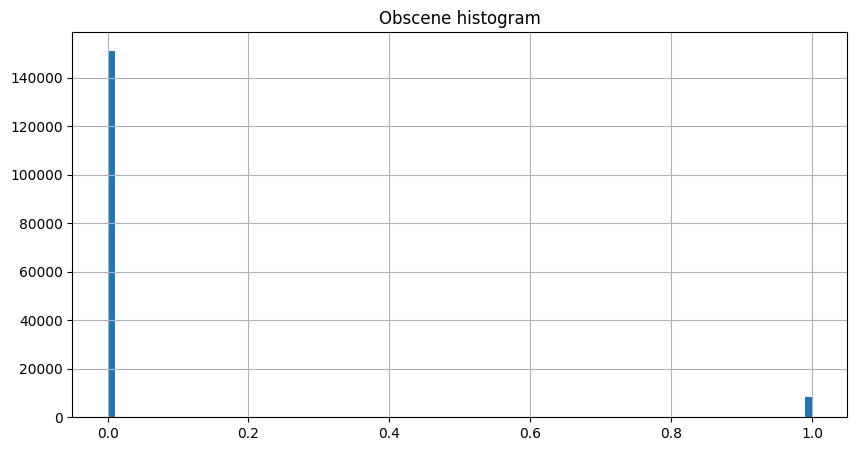

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['obscene'].hist(bins = 100)
plt.title('Obscene histogram')
plt.show()

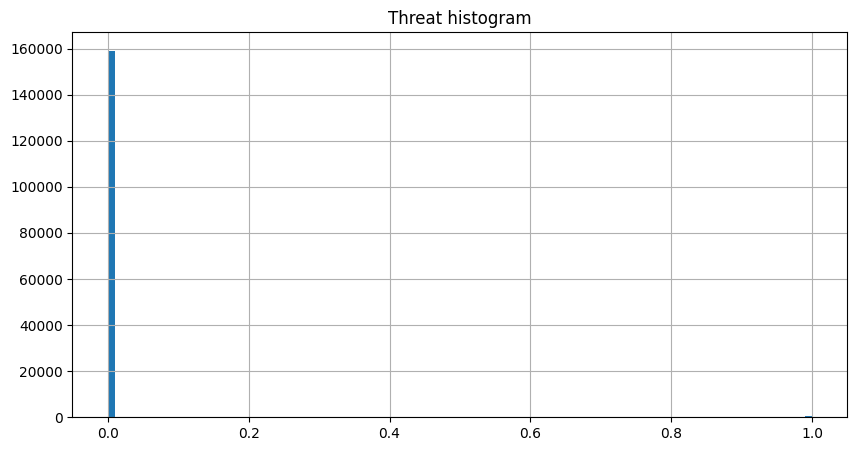

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['threat'].hist(bins = 100)
plt.title('Threat histogram')
plt.show()

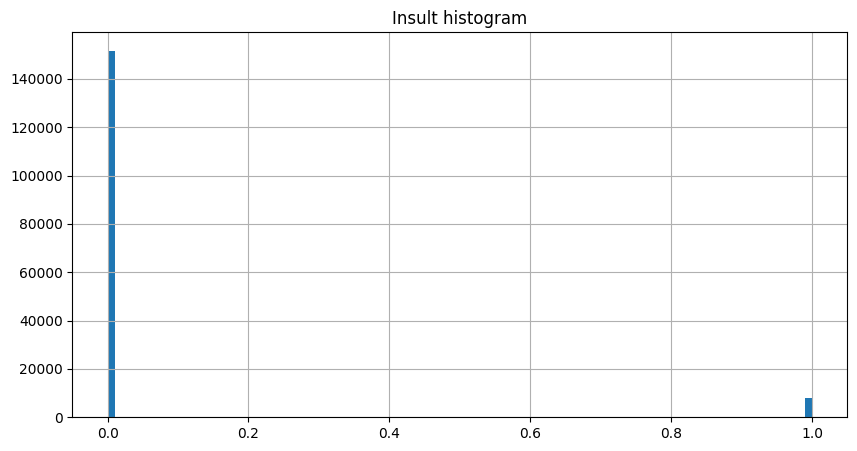

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['insult'].hist(bins = 100)
plt.title('Insult histogram')
plt.show()

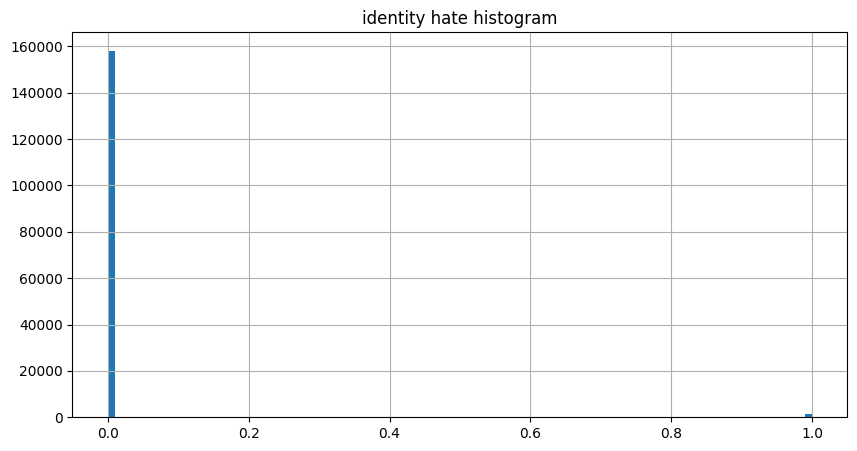

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['identity_hate'].hist(bins = 100)
plt.title('identity hate histogram')
plt.show()

In [ ]:
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f'*************************{col}')
    display(data.loc[data[col]==1,['comment_text',col]].sample(10))

*************************toxic


,comment_text,toxic
111296,Fuck shit kwa kwa kwa!!!,1
47476,I got refresh 4 times faggot.,1
130045,From the lead onwards the page refers to chips...,1
129827,This bitch is a cunt!,1
130151,"""Mayormcgeez; I find reasoning with this guy i...",1
110964,THEY SHOULD DIE\nAND PLEASE NOTE TOO THAT\nbus...,1
115238,Stop biasing my face,1
31756,"(UTC)\nChrist what a dumb question.21:37, 31 D...",1
102888,"Okay, then he isn't an idiot, just a dense per...",1
11646,"hey you deleted your bio and stuff, that kinda...",1


*************************severe_toxic


,comment_text,severe_toxic
32135,"fuck you wikipedia, you are a bunch of fags!",1
96120,"FUCK YOU, YOU RACIST ASSHOLE",1
76607,"you smell of pig shit,",1
99436,"I tell you what, why don't YOU FUCK OFF, you c...",1
105316,FUCK U BASTARD(TURD),1
21546,you suck donkey balls fag,1
76164,Bloody asshole \n\nYou are a bloody asshole an...,1
112503,"Stupid fuck, it's on the script, I also posted...",1
102529,You're an asshole.\nYou're an asshole.\nYou're...,1
110875,For fuck's sake just fucking stop you spastic!...,1


*************************obscene


,comment_text,obscene
60718,"""\n\n You bitch \n\nYou son of a bitch!You are...",1
70102,"Hey, Olyeller: Fuck off.",1
112135,"Why don't you GO TO HELL, how's that fool! I ...",1
52322,You stupid Chinese Wannabe \n\nIf you're Vietn...,1
45718,"Okay okay I see. There's a protocol. \n\nOh, o...",1
144206,FisherQueen can suck my hard cock!,1
102881,I did'nt vandalize anything. Faggot. 166.248.6...,1
114035,", you dummy.\n\nThe man above me is correct",1
138331,"""\n\n A cup of cum for you! \n\n DRINK IT ALL...",1
2154,Look you little cocksucker. I did nothing wron...,1


*************************threat


,comment_text,threat
136178,what the hell man? why did you delete my page ...,1
9650,That's it. Remember last time you fucked with ...,1
13886,You're welcome and I'm gonna vandalize every s...,1
37408,"""\n\n RE: NAIR!!! \n\nSorry Karl, I wasn't abl...",1
72331,"To BongWarrior, Listen you fuckface, maybe you...",1
91224,you just wait \n\nyour death is near,1
126328,Burn In Hell Paulley \nEvery time I try to edi...,1
49200,I'm going to punch you in the ovaries \n\nThat...,1
25588,SLEEP WITH ME OR I WILL FUCKING KILL YOU AND B...,1
156708,Abey Chutiyaay wikipedian. \n\nOye..\n\nLudayy...,1


*************************insult


,comment_text,insult
141998,"I did provide a source you fucking dumbass, an...",1
116038,Stop \n\nWhen you know you're too stupid to un...,1
33917,Halfway decent map of what? You stupid cock-su...,1
28408,"FUCKYOU \n\nwow,just wow james delenoy. u are ...",1
29146,Where the fuck is the printer toner you stupid...,1
40319,stop your bullshit you don't have the ps3 nor ...,1
1910,"My side of the story\n\nAttention, douchebags ...",1
8070,"""\nARE YOU FUCKING RETARDED?\n TAB\n\nPlease ...",1
93396,"""\n\nAnd western reports are? You're a biased ...",1
130250,"Good job really, as you're obviously an idiot.",1


*************************identity_hate


,comment_text,identity_hate
154338,Islam is racist it kills people that resist it...,1
148551,"""u are a fucking wanker!!!! There was no fucke...",1
18973,H YOU NEGROS WIKI USERS LIKE AREASEVEN,1
153663,How could the capital of Israel not be part of...,1
4267,HOLD ON! ive got something to say to u. FUK U!...,1
22378,I fuck niggas! I fuck niggas! I fuck niggas! I...,1
133720,Pedofile \n\nYou are one. I hope you and your ...,1
116767,Go fuck yourself!!! you fucking delteted it an...,1
148368,FUCK YOU Ckatz you are german Cock sucker and ...,1
110115,homosexuals are all pedophiles.,1


# Preprocessing

In [ ]:
#drop id
data = data.drop('id', axis = 1)

In [ ]:
#check duplicate values
duplicate = data.duplicated()
duplicate

0         False
1         False
2         False
3         False
4         False
          ...  
159566    False
159567    False
159568    False
159569    False
159570    False
Length: 159571, dtype: bool

In [ ]:
stop = stopwords.words('english')

In [ ]:
def clean(data, col):
    
    data[col] = data[col].str.replace(r"what's", "what is ")    
    data[col] = data[col].str.replace(r"\'ve", " have ")
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ")
    data[col] = data[col].str.replace(r"i'm", "i am ")
    data[col] = data[col].str.replace(r"\'re", " are ")
    data[col] = data[col].str.replace(r"\'d", " would ")
    data[col] = data[col].str.replace(r"\'ll", " will ")
    data[col] = data[col].str.replace(r"\'scuse", " excuse ")
    data[col] = data[col].str.replace(r"\'s", " ")

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    return data

In [ ]:
data = clean(data, 'comment_text')

<ipython-input-106-b7176b744e24>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'ve", " have ")
<ipython-input-106-b7176b744e24>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'re", " are ")
<ipython-input-106-b7176b744e24>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'d", " would ")
<ipython-input-106-b7176b744e24>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'ll", " will ")
<ipython-input-106-b7176b744e24>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'scuse", " excuse ")
<ipython-input-106-b7176b744e24>:12: FutureWarning: The default value

In [ ]:
#higher score for severe toxic, lower score for non-toxic label
#calculate total score, append new colume to database include (total score) = probability of toxicity, boolean indicates toxicicty/ non-toxicity
def score_label(data):
  df = data
  df['severe_toxic'] = df['severe_toxic']*2
  col = ['obscene', 'threat', 'insult', 'identity_hate']
  for i in col:
    df[i] = 0.5*df[i]
  df['probability'] =(df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
  df['probability'] = df['probability']/df['probability'].max()
  df['toxic indicator'] = df['toxic'] + df['severe_toxic']
  return df



In [ ]:
score_label(data)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,probability,toxic indicator
0,Explanation Why edits made username Hardcore M...,0,0,0.0,0.0,0.0,0.0,0.0,0
1,D ' aww ! He matches background colour I ' see...,0,0,0.0,0.0,0.0,0.0,0.0,0
2,"Hey man, I ' really trying edit war. It guy co...",0,0,0.0,0.0,0.0,0.0,0.0,0
3,""" More I cannot make real suggestions improvem...",0,0,0.0,0.0,0.0,0.0,0.0,0
4,"You, sir, hero. Any chance remember page ?",0,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
159566,""":::::And second time asking, view completely ...",0,0,0.0,0.0,0.0,0.0,0.0,0
159567,You ashamed That horrible thing put talk page....,0,0,0.0,0.0,0.0,0.0,0.0,0
159568,"Spitzer Umm, theres actual article prostitutio...",0,0,0.0,0.0,0.0,0.0,0.0,0
159569,And looks like actually put speedy first versi...,0,0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#plit data
# 0.2% test, 0.2% validation, 0.6% train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)
train, validation = train_test_split(train, test_size = 0.2)

x_train, y_train = train[['comment_text']], train[['probability', 'toxic indicator']]
x_validate, y_validate = validation[['comment_text']], validation[['probability', 'toxic indicator']]
x_test, y_test = test[['comment_text']], test[['probability', 'toxic indicator']]

In [ ]:
#check the probability >0, but not indicated as toxic
for i in range(len(y_train)):
  if y_train.iloc[i][ "toxic indicator"] == 0:
    if y_train.iloc[i][ 'probability'] >0:
      print(y_train.iloc[i][ 'probability'])

0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2


In [ ]:
#convert the result in toxic indicator column to binary 
def binary_convert(data):
  check = []
  for i in range(len(data)):
    if data.iloc[i]['toxic indicator']>=1:
      check.append(1)
    else:
      check.append(0)
  return check 

In [ ]:
binary_y_train = binary_convert(y_train)
binary_y_validate = binary_convert(y_validate)
binary_y_test = binary_convert(y_test)

In [ ]:
#check if uppercase have any indicate in the data toxicity level
def lengthUpperCase(data, result):
  processed_data = list(data['comment_text'])
  for i in range(len(processed_data)):
    #print(i)
    count = 0
    #print(processed_data[i])
    for char in processed_data[i]:
      if char.isupper():
        count = count +1
    result.at[i,'length_uppercase']= count/len(processed_data[i])
  return result

In [ ]:
lengthUpperCase(x_train, y_train)

<ipython-input-114-ae1c0eeeffaa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.at[i,'length_uppercase']= count/len(processed_data[i])
<ipython-input-114-ae1c0eeeffaa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.at[i,'length_uppercase']= count/len(processed_data[i])


,probability,toxic indicator,length_uppercase
6109,0.4,1.0,0.078431
107476,0.0,0.0,NaN
36364,0.0,0.0,0.031250
109170,0.2,1.0,NaN
111325,0.0,0.0,NaN
...,...,...,...
102113,NaN,NaN,0.044547
102116,NaN,NaN,0.049697
102117,NaN,NaN,0.092000
102119,NaN,NaN,0.060345


In [ ]:
y_train['length_uppercase']=y_train['length_uppercase'].fillna(0)
y_train = y_train.dropna()
y_train

,probability,toxic indicator,length_uppercase
6109,0.4,1.0,0.078431
107476,0.0,0.0,0.000000
36364,0.0,0.0,0.031250
109170,0.2,1.0,0.000000
111325,0.0,0.0,0.000000
...,...,...,...
148238,0.0,0.0,0.000000
23637,0.0,0.0,0.043478
68106,0.0,0.0,0.027027
92682,0.0,0.0,0.048387


In [ ]:
#correlation between %upper case and level of toxicity
np.corrcoef(y_train['length_uppercase'], y_train['probability'])

array([[ 1.        , -0.00462422],
       [-0.00462422,  1.        ]])

In [ ]:
#correlation between %upper case and binary of toxicity 
np.corrcoef(y_train['length_uppercase'], binary_y_train)

array([[ 1.        , -0.00296705],
       [-0.00296705,  1.        ]])

# Text processing - BoW

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
x_validate

,comment_text
34670,Facepalm * I referring saying I harassed someo...
154628,"call him: partyjniak 22:41, 9 Feb 2004 (UTC) M..."
5174,! ROBBIE MONCINO LIKES THESE KIND OF PEOPLE ES...
106280,""" Tony Blair Thank experimenting Wikipedia. Yo..."
89808,Mullet man calling us dorks ? You clearly made...
...,...
82205,""" Vandalism Please stop vandalizing """"Natalee_..."
135556,Fine. I find citations show many viewers see s...
38772,"I ' sad hear that. However, I feel I say anyth..."
137033,""" Bah, this, insult competition, I ' meant poi..."


In [ ]:
cnt_vec = CountVectorizer(ngram_range=(1,2), max_features=30000)
vectorizer = CountVectorizer()
bow_train = cnt_vec.fit_transform(x_train['comment_text'])
bow_validate = cnt_vec.transform(x_validate['comment_text'])
bow_test = cnt_vec.transform(x_test['comment_text'])

print(bow_train.shape)
print(bow_validate.shape)
print(bow_test.shape)

(102124, 30000)
(25532, 30000)
(31915, 30000)


# Training - Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

### Base on probability then convert to binary
- Because the data is too unbalanced, then for NB, guessing non-toxic will result in the highest score -> this is not a good technique although it results in high accuracy

In [ ]:
vec = CountVectorizer()
y_train['probability']= y_train['probability'].astype('int')
model = MultinomialNB()
model.fit(bow_train, y_train['probability'])

<ipython-input-88-35d6c8f4bbee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['probability']= y_train['probability'].astype('int')


MultinomialNB()

In [ ]:
#check validate
validate_NB = model.predict_proba(bow_validate)

In [ ]:
#tuning the quantile of convert
def convert_binary(data, step):
  binary = []
  for i in data: 
    if i>np.quantile(data, step):
      binary.append(1)
    else:
      binary.append(0)
  return binary

def accuracy_cal(data, truth):
  count = 0
  for i in range(len(data)):
    if data[i] == truth[i]:
      count = count + 1
  return count/len(data)

step = [0.05*i for i in range(0,21)]
validation_accuracy =[]
for i in step:
  check = convert_binary(validate_NB[:,1], i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.0 -> accuracy 0.09490052
Step: 0.05 -> accuracy 0.13837537
Step: 0.1 -> accuracy 0.18337772
Step: 0.15000000000000002 -> accuracy 0.22841924
Step: 0.2 -> accuracy 0.27428325
Step: 0.25 -> accuracy 0.31869810
Step: 0.30000000000000004 -> accuracy 0.36346546
Step: 0.35000000000000003 -> accuracy 0.40788031
Step: 0.4 -> accuracy 0.45178599
Step: 0.45 -> accuracy 0.49612251
Step: 0.5 -> accuracy 0.53955820
Step: 0.55 -> accuracy 0.58111390
Step: 0.6000000000000001 -> accuracy 0.62200376
Step: 0.65 -> accuracy 0.66261946
Step: 0.7000000000000001 -> accuracy 0.70311766
Step: 0.75 -> accuracy 0.74287169
Step: 0.8 -> accuracy 0.78125490
Step: 0.8500000000000001 -> accuracy 0.81795394
Step: 0.9 -> accuracy 0.85320382
Step: 0.9500000000000001 -> accuracy 0.88426289
Step: 1.0 -> accuracy 0.90631365


In [ ]:
step = [0.99+0.001*i for i in range(1,10)]
validation_accuracy =[]
for i in step:
  check = convert_binary(validate_NB[:,1], i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.991 -> accuracy 0.90325866
Step: 0.992 -> accuracy 0.90353282
Step: 0.993 -> accuracy 0.90408115
Step: 0.994 -> accuracy 0.90439449
Step: 0.995 -> accuracy 0.90482532
Step: 0.996 -> accuracy 0.90525615
Step: 0.997 -> accuracy 0.90564781
Step: 0.998 -> accuracy 0.90615698
Step: 0.999 -> accuracy 0.90647031


In [ ]:
#check test accuracy 
predict_NB= model.predict_proba(bow_test)
step = 0.999
check = convert_binary(predict_NB[:,1], step)
accuracy = accuracy_cal(check, binary_y_test)

In [ ]:
accuracy

0.9016449945166849

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
err_NB = mean_squared_error(predict_NB[:,1], y_test['probability'])
err_NB

0.013742198668799822

### Base only on toxic indicator

In [ ]:
model = MultinomialNB()
model.fit(bow_train, binary_y_train)

MultinomialNB()

In [ ]:
#check validate
validate_NB = model.predict_proba(bow_validate)

In [ ]:
step = [0.05*i for i in range(0,21)]
validation_accuracy =[]
for i in step:
  check = convert_binary(validate_NB[:,1], i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.0 -> accuracy 0.09493968
Step: 0.05 -> accuracy 0.14307536
Step: 0.1 -> accuracy 0.19215103
Step: 0.15000000000000002 -> accuracy 0.24126586
Step: 0.2 -> accuracy 0.29002820
Step: 0.25 -> accuracy 0.33898637
Step: 0.30000000000000004 -> accuracy 0.38821871
Step: 0.35000000000000003 -> accuracy 0.43678521
Step: 0.4 -> accuracy 0.48570421
Step: 0.45 -> accuracy 0.53411405
Step: 0.5 -> accuracy 0.58240639
Step: 0.55 -> accuracy 0.62913207
Step: 0.6000000000000001 -> accuracy 0.67621025
Step: 0.65 -> accuracy 0.72371925
Step: 0.7000000000000001 -> accuracy 0.77118910
Step: 0.75 -> accuracy 0.81744478
Step: 0.8 -> accuracy 0.86201629
Step: 0.8500000000000001 -> accuracy 0.90694031
Step: 0.9 -> accuracy 0.94117186
Step: 0.9500000000000001 -> accuracy 0.94583268
Step: 1.0 -> accuracy 0.90631365


In [ ]:
predict_NB= model.predict_proba(bow_test)
step = 0.95
check = convert_binary(predict_NB[:,1], step)
accuracy = accuracy_cal(check, binary_y_test)

In [ ]:
accuracy

0.9413755287482375

In [ ]:
err_NB = mean_squared_error(predict_NB[:,1], y_test['probability'])
err_NB

0.044521219174130156

# Training - SGD

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [ ]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        print('alpha: {} -> penlaty {}'.format(a, p))
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train['probability']) # Train
        
        prediction = model.predict(bow_train) # Get predictions
        error = mean_squared_error(y_train['probability'], prediction) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", error)
        
        prediction = model.predict(bow_validate) 
        error = mean_squared_error(y_validate['probability'], prediction) 
        cv_errors.append(error)
        print("Mean Squared Error on validate set: ", error)
        
        if error < best_error: 
            best_error = error
            best_model = model
        
        print("-----------------------------------------------")

alpha: 1e-05 -> penlaty l1
Mean Squared Error on train set:  2.459374854526336e+25
Mean Squared Error on validate set:  7.926314119513088e+23
-----------------------------------------------
alpha: 1e-05 -> penlaty l2
Mean Squared Error on train set:  2.924824903143688e+25
Mean Squared Error on validate set:  3.970197195824065e+23
-----------------------------------------------
alpha: 0.0001 -> penlaty l1
Mean Squared Error on train set:  3.1951564631443458e+25
Mean Squared Error on validate set:  6.054630943096359e+23
-----------------------------------------------
alpha: 0.0001 -> penlaty l2
Mean Squared Error on train set:  2.763232602895053e+25
Mean Squared Error on validate set:  1.2812183058897302e+24
-----------------------------------------------
alpha: 0.001 -> penlaty l1
Mean Squared Error on train set:  1.951502194545984e+25
Mean Squared Error on validate set:  6.882682288265661e+23
-----------------------------------------------
alpha: 0.001 -> penlaty l2
Mean Squared Error 

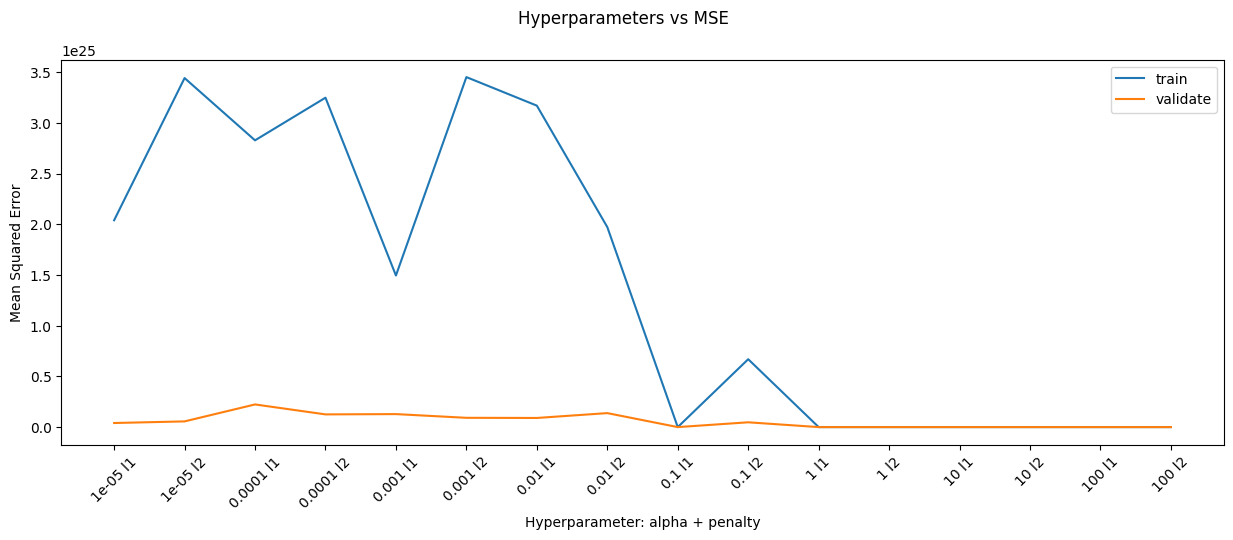

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(alpha) * len(penalty)), tr_errors)
plt.plot(range(len(alpha) * len(penalty)), cv_errors)
plt.legend(['train', 'validate'])
plt.xticks(range(len(alpha) * len(penalty)), xticks, rotation=45)
plt.xlabel('Hyperparameter: alpha + penalty')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# Getting the best model parameters:
best_model.get_params()

{'alpha': 1,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
alpha = 0.01
penalty = 'l1'
model = SGDRegressor(alpha=alpha, penalty=penalty) 
model.fit(bow_train,binary_y_train) 


SGDRegressor(alpha=0.01, penalty='l1')

In [ ]:
#tuning quantile 
step = [0.05*i for i in range(0,21)]
validate_SDG = model.predict(bow_validate)
for i in step:
  check = convert_binary(validate_SDG, i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.0 -> accuracy 0.09364719
Step: 0.05 -> accuracy 0.11244713
Step: 0.1 -> accuracy 0.14640451
Step: 0.15000000000000002 -> accuracy 0.18400439
Step: 0.2 -> accuracy 0.22509008
Step: 0.25 -> accuracy 0.26801661
Step: 0.30000000000000004 -> accuracy 0.30988563
Step: 0.35000000000000003 -> accuracy 0.35265549
Step: 0.4 -> accuracy 0.39585618
Step: 0.45 -> accuracy 0.43901770
Step: 0.5 -> accuracy 0.48378505
Step: 0.55 -> accuracy 0.52776907
Step: 0.6000000000000001 -> accuracy 0.57163559
Step: 0.65 -> accuracy 0.61428795
Step: 0.7000000000000001 -> accuracy 0.65768447
Step: 0.75 -> accuracy 0.70198183
Step: 0.8 -> accuracy 0.74451668
Step: 0.8500000000000001 -> accuracy 0.78810904
Step: 0.9 -> accuracy 0.82954723
Step: 0.9500000000000001 -> accuracy 0.86906627
Step: 1.0 -> accuracy 0.90631365


In [ ]:
#predict 
predict_SDG = model.predict(bow_test)
check_predict_SDG =[]
for i in predict_SDG:
  if i>=np.quantile(predict_SDG, 0.95):
    check_predict_SDG.append(1)
  else:
    check_predict_SDG.append(0)
accuracy_cal(check_predict_SDG, binary_y_test)


0.8651104496318346

In [ ]:
err_SDG = mean_squared_error(check_predict_SDG, binary_y_test)

In [ ]:
err_SDG

0.13488955036816544

# Training - DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
max_depth = [3, 5, 7]
min_samples = [10, 100, 1000]
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for d in max_depth:
    for samp in min_samples:
       
        print('max_depth: {}, min_samples {}'.format(d, samp))
        
        model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=samp)
        model.fit(bow_train, binary_y_train) 
        
        prediction = model.predict(bow_train) 
        error = mean_squared_error(binary_y_train, prediction) 
        tr_errors.append(error)
        print("Mean Squared Error on train set: ", error)
        
        prediction = model.predict(bow_validate) 
        error = mean_squared_error(binary_y_validate, prediction) 
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", error)
        
        if error < best_error: 
            best_error = error
            best_model = model
        
        print("---------------------------------------------")


max_depth: 3, min_samples 10
Mean Squared Error on train set:  0.08661727502756122
Mean Squared Error on cv set:  0.08562859336973756
---------------------------------------------
max_depth: 3, min_samples 100
Mean Squared Error on train set:  0.0866478173128735
Mean Squared Error on cv set:  0.08554088169362592
---------------------------------------------
max_depth: 3, min_samples 1000
Mean Squared Error on train set:  0.08666111986948843
Mean Squared Error on cv set:  0.08553487124222557
---------------------------------------------
max_depth: 5, min_samples 10
Mean Squared Error on train set:  0.08658209414704511
Mean Squared Error on cv set:  0.08567002486059945
---------------------------------------------
max_depth: 5, min_samples 100
Mean Squared Error on train set:  0.0866242254626256
Mean Squared Error on cv set:  0.08560011850007358
---------------------------------------------
max_depth: 5, min_samples 1000
Mean Squared Error on train set:  0.08664589780546868
Mean Squared 

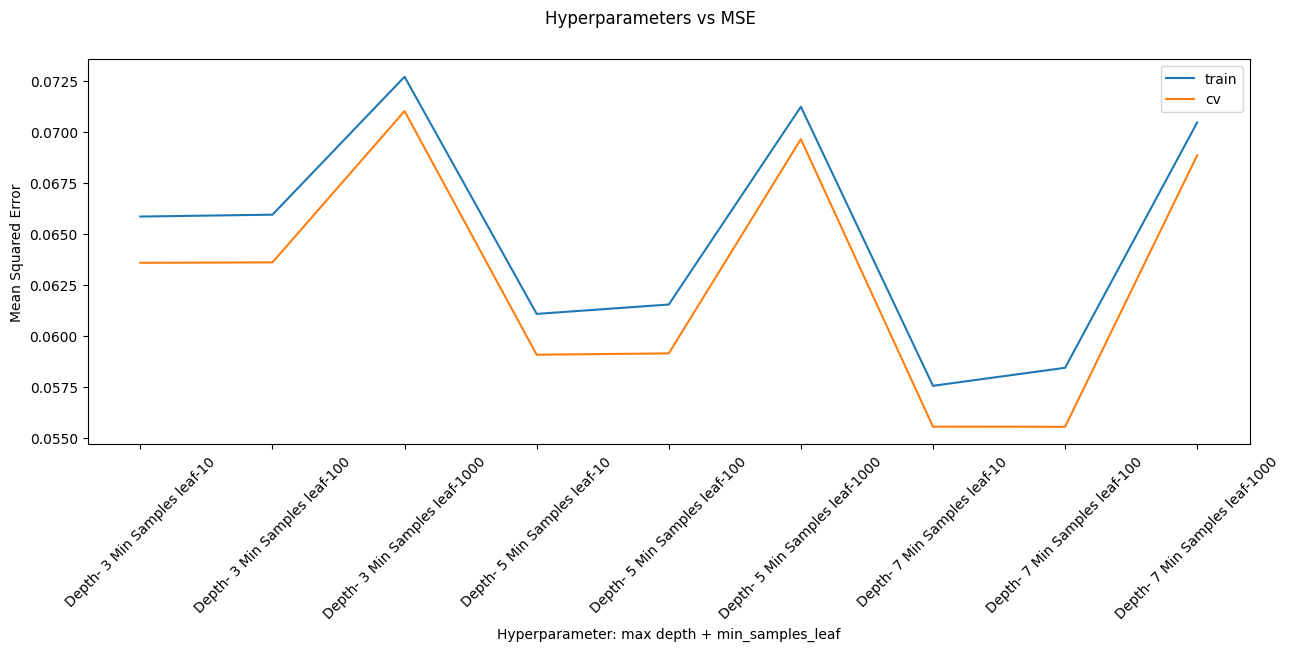

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(max_depth) * len(min_samples)), tr_errors)
plt.plot(range(len(max_depth) * len(min_samples)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(max_depth) * len(min_samples)), xticks, rotation=45)
plt.xlabel('Hyperparameter: max depth + min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.show()


In [ ]:
# Best models parameters:
best_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
max_depth = 3
min_samples_leaf = 1000
min_samples_split =2

In [ ]:
model = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
model.fit(bow_train, binary_y_train) 
validate_DT = model.predict(bow_validate) 

In [ ]:
#tuning quantile
step = [0.05*i for i in range(0,21)]
for i in step:
  check = convert_binary(validate_DT, i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.0 -> accuracy 0.12474542
Step: 0.05 -> accuracy 0.27984490
Step: 0.1 -> accuracy 0.27984490
Step: 0.15000000000000002 -> accuracy 0.27984490
Step: 0.2 -> accuracy 0.83753721
Step: 0.25 -> accuracy 0.83753721
Step: 0.30000000000000004 -> accuracy 0.83753721
Step: 0.35000000000000003 -> accuracy 0.83753721
Step: 0.4 -> accuracy 0.83753721
Step: 0.45 -> accuracy 0.83753721
Step: 0.5 -> accuracy 0.83753721
Step: 0.55 -> accuracy 0.83753721
Step: 0.6000000000000001 -> accuracy 0.83753721
Step: 0.65 -> accuracy 0.83753721
Step: 0.7000000000000001 -> accuracy 0.83753721
Step: 0.75 -> accuracy 0.83753721
Step: 0.8 -> accuracy 0.83753721
Step: 0.8500000000000001 -> accuracy 0.83753721
Step: 0.9 -> accuracy 0.92057026
Step: 0.9500000000000001 -> accuracy 0.92057026
Step: 1.0 -> accuracy 0.90631365


In [ ]:
predict_DT = model.predict(bow_test)
check_predict_DT =[]
for i in predict_DT:
  if i>=np.quantile(predict_DT, 0.95):
    check_predict_DT.append(1)
  else:
    check_predict_DT.append(0)
accuracy_cal(check_predict_DT, binary_y_test)

0.8322732257559141

In [ ]:
err_DT = mean_squared_error(check_predict_DT, binary_y_test)
err_DT

0.16772677424408586

# Test processing - TF-IDF

In [ ]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
tfidf_train = tfidf_vec.fit_transform(x_train['comment_text'])
tfidf_validate = tfidf_vec.transform(x_validate['comment_text'])
tfidf_test = tfidf_vec.transform(x_test['comment_text'])

print(tfidf_train.shape)
print(tfidf_validate.shape)
print(tfidf_test.shape)

(102124, 30000)
(25532, 30000)
(31915, 30000)


# Training - SGD

In [ ]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        print('alpha: {} -> penlaty {}'.format(a, p))
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(tfidf_train, binary_y_train) 
        prediction = model.predict(tfidf_train)

       
        error = mean_squared_error(binary_y_train, prediction)
        tr_errors.append(error)
        print("Mean Squared Error on train set: ", error)
        
        prediction = model.predict(tfidf_validate) 
        error = mean_squared_error(binary_y_validate, prediction) 
        cv_errors.append(error)
        print("Mean Squared Error on cv set: ", error)
        
        if error < best_error: # Get best model trained
            best_error = error
            best_model = model
        
        print("-------------------------------------------------")

alpha: 1e-05 -> penlaty l1
Mean Squared Error on train set:  0.08665211449525473
Mean Squared Error on cv set:  0.08572256725032973
-------------------------------------------------
alpha: 1e-05 -> penlaty l2
Mean Squared Error on train set:  0.0863743270440746
Mean Squared Error on cv set:  0.08575832515192287
-------------------------------------------------
alpha: 0.0001 -> penlaty l1
Mean Squared Error on train set:  0.08674519472436963
Mean Squared Error on cv set:  0.08559243588960691
-------------------------------------------------
alpha: 0.0001 -> penlaty l2
Mean Squared Error on train set:  0.08637940285369865
Mean Squared Error on cv set:  0.085752892935526
-------------------------------------------------
alpha: 0.001 -> penlaty l1
Mean Squared Error on train set:  0.08669500207382214
Mean Squared Error on cv set:  0.08551814019249554
-------------------------------------------------
alpha: 0.001 -> penlaty l2
Mean Squared Error on train set:  0.08640510927807986
Mean Squar

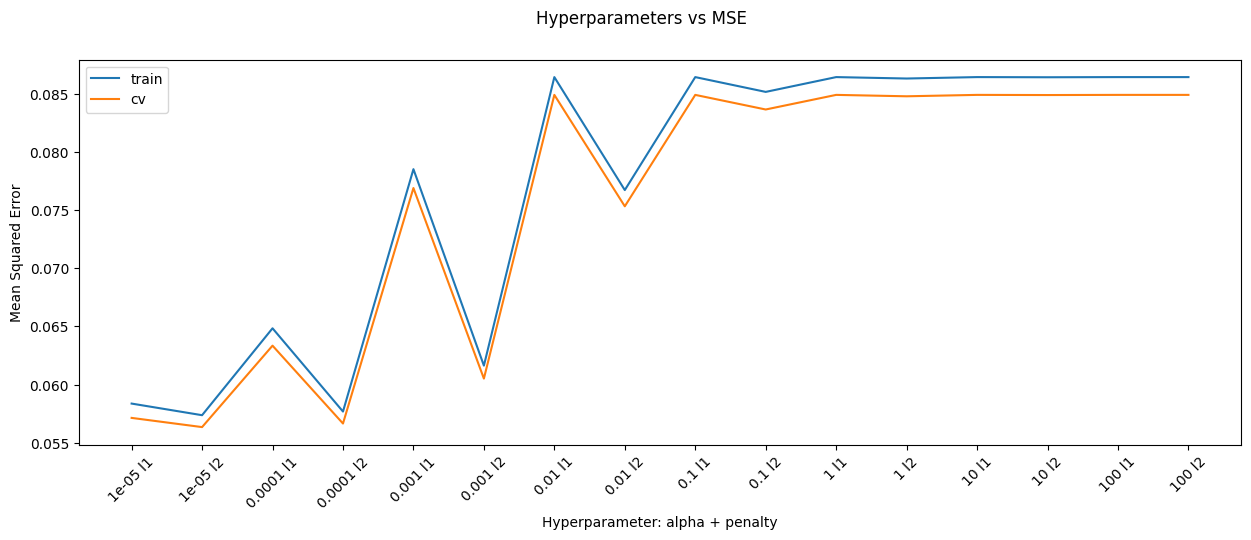

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(alpha) * len(penalty)), tr_errors)
plt.plot(range(len(alpha) * len(penalty)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(alpha) * len(penalty)), xticks, rotation=45)
plt.xlabel('Hyperparameter: alpha + penalty')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# Best models parameters:
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
alpha = 100
penalty = 'l2'
model = SGDRegressor(alpha=alpha, penalty=penalty) 
model.fit(tfidf_train,binary_y_train)
#tuning quantile 
step = [0.05*i for i in range(0,21)]
validate_SDG = model.predict(tfidf_validate)
for i in step:
  check = convert_binary(validate_SDG, i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.0 -> accuracy 0.09380385
Step: 0.05 -> accuracy 0.14205703
Step: 0.1 -> accuracy 0.18956603
Step: 0.15000000000000002 -> accuracy 0.23648755
Step: 0.2 -> accuracy 0.28266489
Step: 0.25 -> accuracy 0.32770641
Step: 0.30000000000000004 -> accuracy 0.37294376
Step: 0.35000000000000003 -> accuracy 0.41743694
Step: 0.4 -> accuracy 0.46055930
Step: 0.45 -> accuracy 0.50082250
Step: 0.5 -> accuracy 0.54527652
Step: 0.55 -> accuracy 0.59098386
Step: 0.6000000000000001 -> accuracy 0.63602538
Step: 0.65 -> accuracy 0.68134106
Step: 0.7000000000000001 -> accuracy 0.72426759
Step: 0.75 -> accuracy 0.76637161
Step: 0.8 -> accuracy 0.80804481
Step: 0.8500000000000001 -> accuracy 0.84701551
Step: 0.9 -> accuracy 0.88195206
Step: 0.9500000000000001 -> accuracy 0.90885947
Step: 1.0 -> accuracy 0.90631365


In [ ]:
predict_SDG = model.predict(tfidf_test)
check_predict_SDG =[]
for i in predict_SDG:
  if i>=np.quantile(predict_SDG, 0.95):
    check_predict_SDG.append(1)
  else:
    check_predict_SDG.append(0)
accuracy_cal(check_predict_SDG, binary_y_test)

0.9039009869967101

In [ ]:
err_SDG = mean_squared_error(check_predict_SDG, binary_y_test)
err_SDG

0.09609901300328999

# Training - NB

In [ ]:
vec = TfidfVectorizer()
y_train['probability']= y_train['probability'].astype('int')
model = MultinomialNB()
model.fit(bow_train, binary_y_train)

<ipython-input-73-7cb51045e6f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['probability']= y_train['probability'].astype('int')


MultinomialNB()

In [ ]:
#check validate
validate_NB = model.predict_proba(bow_validate)

In [ ]:
step = [0.05*i for i in range(0,21)]
validation_accuracy =[]
for i in step:
  check = convert_binary(validate_NB[:,1], i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.0 -> accuracy 0.09493968
Step: 0.05 -> accuracy 0.14307536
Step: 0.1 -> accuracy 0.19215103
Step: 0.15000000000000002 -> accuracy 0.24126586
Step: 0.2 -> accuracy 0.29002820
Step: 0.25 -> accuracy 0.33898637
Step: 0.30000000000000004 -> accuracy 0.38821871
Step: 0.35000000000000003 -> accuracy 0.43678521
Step: 0.4 -> accuracy 0.48570421
Step: 0.45 -> accuracy 0.53411405
Step: 0.5 -> accuracy 0.58240639
Step: 0.55 -> accuracy 0.62913207
Step: 0.6000000000000001 -> accuracy 0.67621025
Step: 0.65 -> accuracy 0.72371925
Step: 0.7000000000000001 -> accuracy 0.77118910
Step: 0.75 -> accuracy 0.81744478
Step: 0.8 -> accuracy 0.86201629
Step: 0.8500000000000001 -> accuracy 0.90694031
Step: 0.9 -> accuracy 0.94117186
Step: 0.9500000000000001 -> accuracy 0.94583268
Step: 1.0 -> accuracy 0.90631365


In [ ]:
model = MultinomialNB()
model.fit(tfidf_train, y_train['probability'])

MultinomialNB()

In [ ]:
predict_NB= model.predict_proba(tfidf_test)
step = 0.95
check = convert_binary(predict_NB[:,1], step)
accuracy = accuracy_cal(check, binary_y_test)

In [ ]:
accuracy

0.8739464201785994

In [ ]:
err_NB = mean_squared_error(predict_NB[:,1], binary_y_test)
err_NB

0.09845444567472572

# Training - DT

In [ ]:
max_depth = [3, 5, 7]
min_samples = [10, 100, 1000]
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for d in max_depth:
    for samp in min_samples:
        print('max_depth: {} min_samples {}'.format(d, samp))
        
        model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=samp)
        model.fit(tfidf_train, binary_y_train) 
        
        prediction = model.predict(tfidf_train) 
        error = mean_squared_error(binary_y_train, prediction) 
        tr_errors.append(error)
        print("Mean Squared Error on train set: ", error)
        
        prediction = model.predict(tfidf_validate) 
        error = mean_squared_error(binary_y_validate, preds) 
        cv_errors.append(error)
        print("Mean Squared Error on cv set: ", error)
        
        if error < best_error:
            best_error = error
            best_model = model
        
        print("---------------------------------------")


max_depth: 3 min_samples 10
Mean Squared Error on train set:  0.08658537050392405
Mean Squared Error on cv set:  0.08562859336973756
---------------------------------------
max_depth: 3 min_samples 100
Mean Squared Error on train set:  0.08663994583172589
Mean Squared Error on cv set:  0.08562859336973756
---------------------------------------
max_depth: 3 min_samples 1000
Mean Squared Error on train set:  0.08665054925960765
Mean Squared Error on cv set:  0.08562859336973756
---------------------------------------
max_depth: 5 min_samples 10
Mean Squared Error on train set:  0.08651452037226275
Mean Squared Error on cv set:  0.08562859336973756
---------------------------------------
max_depth: 5 min_samples 100
Mean Squared Error on train set:  0.08661275162589588
Mean Squared Error on cv set:  0.08562859336973756
---------------------------------------
max_depth: 5 min_samples 1000
Mean Squared Error on train set:  0.0866312028634588
Mean Squared Error on cv set:  0.085628593369737

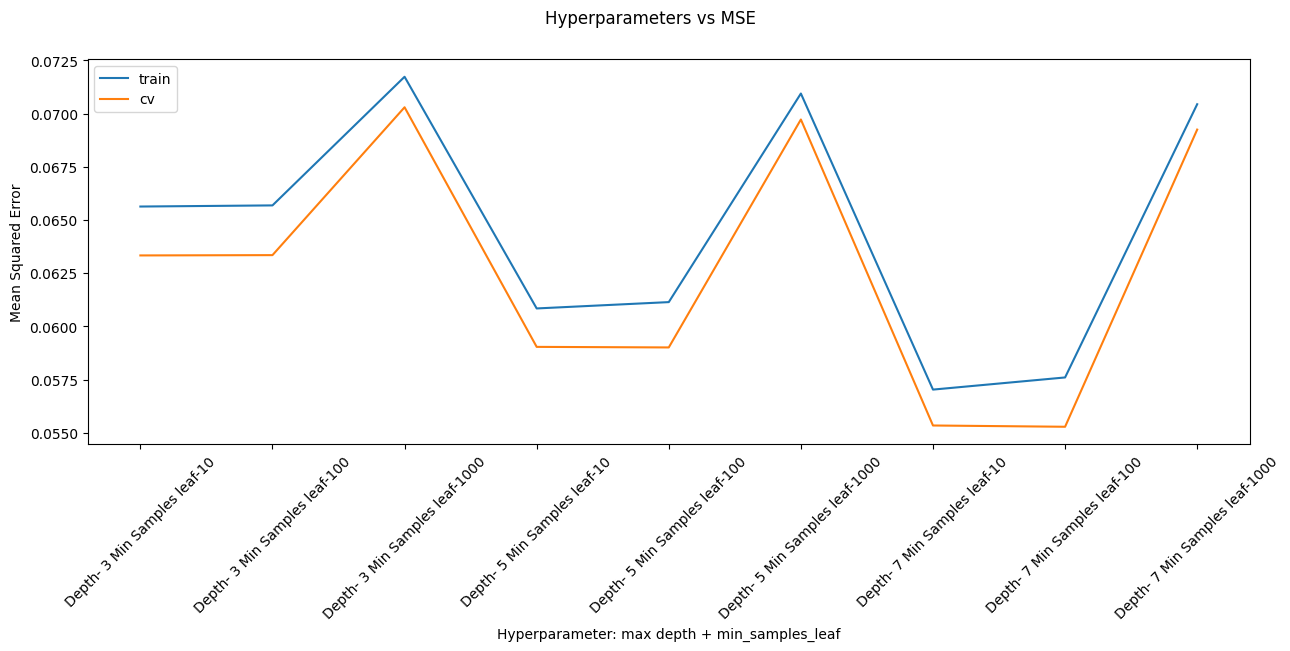

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(max_depth) * len(min_samples)), tr_errors)
plt.plot(range(len(max_depth) * len(min_samples)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(max_depth) * len(min_samples)), xticks, rotation=45)
plt.xlabel('Hyperparameter: max depth + min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.show()


In [ ]:
# Best models parameters:
best_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
max_depth = 7
min_sample_leaf = 100
model = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
model.fit(tfidf_train, binary_y_train) 
validate_DT = model.predict(tfidf_validate) 

In [ ]:
#tuning quantile
step = [0.05*i for i in range(0,21)]
for i in step:
  check = convert_binary(validate_DT, i)
  accuracy = accuracy_cal(check, binary_y_validate )
  print('Step: {} -> accuracy {:.08f}'.format(i, accuracy))
  validation_accuracy.append(accuracy)

Step: 0.0 -> accuracy 0.11393545
Step: 0.05 -> accuracy 0.14507285
Step: 0.1 -> accuracy 0.20339182
Step: 0.15000000000000002 -> accuracy 0.29179069
Step: 0.2 -> accuracy 0.29179069
Step: 0.25 -> accuracy 0.33663638
Step: 0.30000000000000004 -> accuracy 0.39887200
Step: 0.35000000000000003 -> accuracy 0.43592355
Step: 0.4 -> accuracy 0.87827041
Step: 0.45 -> accuracy 0.87827041
Step: 0.5 -> accuracy 0.87827041
Step: 0.55 -> accuracy 0.87827041
Step: 0.6000000000000001 -> accuracy 0.87827041
Step: 0.65 -> accuracy 0.87827041
Step: 0.7000000000000001 -> accuracy 0.87827041
Step: 0.75 -> accuracy 0.87827041
Step: 0.8 -> accuracy 0.87827041
Step: 0.8500000000000001 -> accuracy 0.87827041
Step: 0.9 -> accuracy 0.87827041
Step: 0.9500000000000001 -> accuracy 0.90725364
Step: 1.0 -> accuracy 0.90631365


In [ ]:
predict_DT = model.predict(tfidf_test)
check_predict_DT =[]
for i in predict_DT:
  if i>=np.quantile(predict_DT, 0.95):
    check_predict_DT.append(1)
  else:
    check_predict_DT.append(0)
accuracy_cal(check_predict_DT, binary_y_test)

0.9053736487545041

In [ ]:
err_DT = mean_squared_error(check_predict_DT, binary_y_test)
err_DT

0.09462635124549584